In [1]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import folium
import gmaps
from datetime import datetime

%matplotlib inline



In [72]:
#2.	Read in police call data for 2016 to a data frame called police_2016 and look at the first 5 rows. 
    #Look at the last five rows of police_2016.


police_2016 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2016_.csv')
police_2016

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,20160000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,300.0,HERRON DR,311C,S,11.0,8125.0,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,20160000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,500.0,MAIN ST,213C,E,11.0,1113.0,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,20160000017,C,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,EDMONDSON PKE & MCMURRAY DR,835C,MT,33.0,8657.0,36.055,-86.743,"(36.055, -86.743)"
3,PD201600000004,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,500.0,S 5TH ST,NaN,E,11.0,1011.0,36.167,-86.762,"(36.167, -86.762)"
4,PD201600000005,01/01/2016 12:00:00 AM,20160000005,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,1100.0,BELL RD,333C,S,25.0,8721.0,36.046,-86.666,"(36.046, -86.666)"
5,PD201600000006,01/01/2016 12:00:00 AM,20160000006,C,46,Vehicle Accident - Personal Injury,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,MT VIEW RD & MURFREESBORO PKE,333C,S,33.0,8865.0,36.054,-86.619,"(36.054, -86.619)"
6,PD201600000007,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,600.0,S 6TH ST,NaN,E,11.0,1021.0,36.166,-86.759,"(36.166, -86.759)"
7,PD201600000008,01/01/2016 12:02:00 AM,20160000011,C,83,Shots Fired,P,PROGRESS,5,GONE ON ARRIVAL,2500.0,SANTI AV,613C,N,13.0,4463.0,36.179,-86.818,"(36.179, -86.818)"
8,PD201600000009,01/01/2016 12:02:00 AM,20160000008,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,HERMITAGE AV,511C,NaN,NaN,NaN,NaN,NaN,NaN
9,PD201600000010,01/01/2016 12:02:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,1600.0,CAHAL AV,NaN,E,17.0,1431.0,36.196,-86.734,"(36.196, -86.734)"


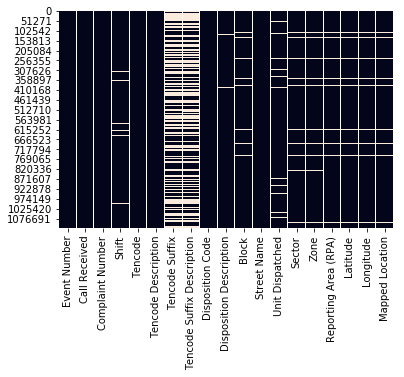

In [3]:
#Checking if data contains Null Values or not

sns.heatmap(police_2016.isnull(), cbar=False)

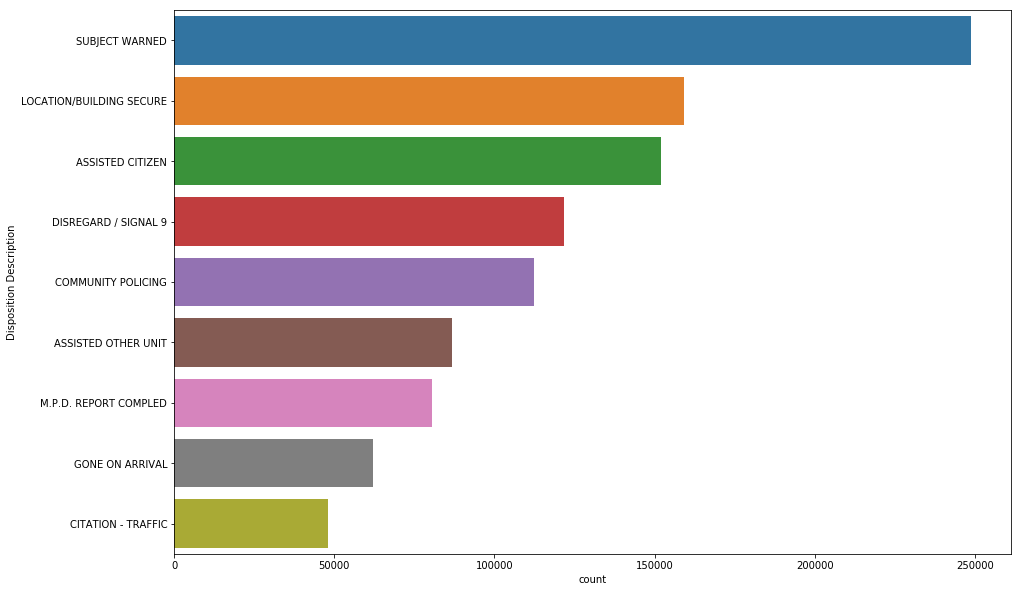

In [4]:
#Disposition Description and its semantics

plt.figure(figsize = (15, 10))
sns.countplot(y= 'Disposition Description', data = police_2016, order = police_2016['Disposition Description'].value_counts().iloc[:9].index)


In [5]:
police_2016.fillna(0, inplace=True)

In [6]:
police_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127959 entries, 0 to 1127958
Data columns (total 19 columns):
Event Number                  1127959 non-null object
Call Received                 1127959 non-null object
Complaint Number              1127959 non-null int64
Shift                         1127959 non-null object
Tencode                       1127959 non-null object
Tencode Description           1127959 non-null object
Tencode Suffix                1127959 non-null object
Tencode Suffix Description    1127959 non-null object
Disposition Code              1127959 non-null int64
Disposition Description       1127959 non-null object
Block                         1127959 non-null float64
Street Name                   1127959 non-null object
Unit Dispatched               1127959 non-null object
Sector                        1127959 non-null object
Zone                          1127959 non-null float64
Reporting Area (RPA)          1127959 non-null float64
Latitude              

In [7]:
#import gmaps
from config import gkey

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)



# Store latitude and longitude in locations
locations = police_2016[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
#rating = police_2016["Airport Rating"].astype(float)



rating = police_2016['Mapped Location'].value_counts().iloc[:19].index.astype(float)

fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

#nashville_map_crime = folium.Map(location=[36.133, -86.751],
#                        zoom_start=13,
#                        tiles="CartoDB dark_matter")

#for i in range(500):
#    lat = CR_index['LocationCoord'].iloc[i][0]
#    long = CR_index['LocationCoord'].iloc[i][1]
#    radius = CR_index['ValueCount'].iloc[i] / 45
    
#    if CR_index['ValueCount'].iloc[i] > 1000:
#       color = "#FF4500"
#    else:
#        color = "#008080"
    
#    popup_text = """Latitude : {}<br>
#                Longitude : {}<br>
#                Criminal Incidents : {}<br>"""
#    popup_text = popup_text.format(lat,
#                              long,
#                               CR_index['ValueCount'].iloc[i]
#                               )
#    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

TypeError: Cannot cast Index to dtype <class 'float'>

In [8]:
#3.	How many rows and columns does police_2016 contain?

police_2016.shape

(1127959, 19)

In [9]:
#4.	Keep just these 12 columns: 

keep_cols = ['Event Number', 'Call Received', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude']

police_2016_subset = police_2016[keep_cols]

police_2016_subset.columns



Index(['Event Number', 'Call Received', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
police_2016.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Tencode Suffix', 'Tencode Suffix Description',
       'Disposition Code', 'Disposition Description', 'Block', 'Street Name',
       'Unit Dispatched', 'Sector', 'Zone', 'Reporting Area (RPA)', 'Latitude',
       'Longitude', 'Mapped Location'],
      dtype='object')

In [11]:
#5.	Rename the columns above:

police_2016_subset = police_2016_subset.rename(columns = {'Event Number' : 'id' , 'Call Received' : 'call_time' , 'Shift' : 'shift' , 'Unit Dispatched': 'unit','Tencode' : 'tencode' , 'Tencode Description' : 'tencode_desc' , 'Disposition Code' : 'disposition' , 'Disposition Description' : 'disposition_desc', 'Sector' : 'sector' , 'Zone' : 'zone' , 'Latitude' : 'lat' , 'Longitude' : 'lng'})

police_2016_subset.columns


Index(['id', 'call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'sector', 'zone', 'unit', 'lat', 'lng'],
      dtype='object')

In [12]:
#6.	Which unit answered the most calls in 2016? How many calls did they answer?

type_counts = police_2016_subset.unit.value_counts()
type_counts = type_counts.to_frame()
type_counts = type_counts.reset_index()
type_counts.iloc[0]
#most_calls = type_counts.loc[type_counts['unit'].idxmax()]
#df.loc[df['Score'].idxmax()]
#most_calls


index        0
unit     55130
Name: 0, dtype: object

In [13]:
#7.	How many units answered more than 1000 calls in 2016?


GT1000 = type_counts.loc[type_counts['unit'] > 1000]
#df.loc[df['column_name'] == some_value]
GT1000.describe()

#sum(police_2016.units.value_counts()>1000)


,unit
count,375.000000
mean,2473.053333
std,2862.800981
min,1001.000000
25%,1570.500000
50%,2258.000000
75%,2989.500000
max,55130.000000


In [14]:
#8.	What tencode description is associated with the greatest number of calls in 2013?

tendesc = police_2016_subset.tencode_desc.value_counts()
tendesc = tendesc.to_frame()
tendesc = tendesc.reset_index()
tendesc = tendesc.rename(columns = {'index' : 'crime' , 'tencode_desc' : 'count'})
tendesc
#tendesc.iloc[0]

,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475
5,Vehicle Accident - Property Damage,42396
6,Disorderly Person,39457
7,Suspicious Person,37958
8,Safety Hazard,37327
9,Theft,34156


In [15]:
tendesc.head()


,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475


In [16]:
tendesc10 = tendesc.iloc[0:10]
tendesc10

,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475
5,Vehicle Accident - Property Damage,42396
6,Disorderly Person,39457
7,Suspicious Person,37958
8,Safety Hazard,37327
9,Theft,34156


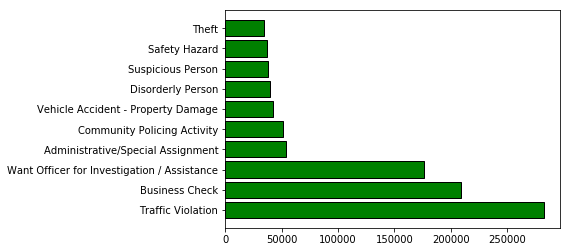

In [17]:
#10.	Make a horizontal barplot of the crime counts.

#?plt.barh

plt.barh('crime', 'count', data=tendesc10, color = 'green', edgecolor = 'black');

#plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

In [18]:
    #2.	Read in police call data for 2017 to a data frame called police_2017 and look at the first 5 rows. 
    #Look at the last five rows of police_2017.

police_2017 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2017_.csv')
police_2017.head()
police_2017.tail()



,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1105378,PD201701313668,12/31/2017 11:56:00 PM,20171140163,NaN,44,Disorderly Person,P,PROGRESS,4,ASSISTED CITIZEN,0.0,SHELBY AV & I24 E,UTV2,C,13.0,1107.0,36.167,-86.765,"(36.167, -86.765)"
1105379,PD201701313669,12/31/2017 11:57:00 PM,20180000007,NaN,57,Fight / Assault,P,PROGRESS,4,ASSISTED CITIZEN,400.0,BROADWAY,SQUAD,C,21.0,4107.0,36.161,-86.778,"(36.161, -86.778)"
1105380,PD201701313670,12/31/2017 11:58:00 PM,20180000005,NaN,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,1900.0,DIVISION ST,815C,MT,11.0,6711.0,36.149,-86.797,"(36.149, -86.797)"
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,5400.0,NOLENSVILLE PKE,834C,MT,35.0,8655.0,36.051,-86.714,"(36.051, -86.714)"
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,1300.0,RURAL HILL RD,317C,S,25.0,8861.0,36.056,-86.651,"(36.056, -86.651)"


In [19]:
#3.	How many rows and columns does police_2017 contain?

police_2017.shape

(1105383, 19)

In [20]:
#4.	Keep just these 12 columns: 

keep_cols = ['Event Number', 'Call Received', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude']

police_2017_subset = police_2017[keep_cols]

police_2017_subset.columns



Index(['Event Number', 'Call Received', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude'],
      dtype='object')

In [21]:
#5.	Rename the columns above:


police_2017_subset = police_2017_subset.rename(columns = {'Event Number' : 'id' , 'Call Received' : 'call_time' , 'Shift' : 'shift' , 'Unit Dispatched': 'unit','Tencode' : 'tencode' , 'Tencode Description' : 'tencode_desc' , 'Disposition Code' : 'disposition' , 'Disposition Description' : 'disposition_desc', 'Sector' : 'sector' , 'Zone' : 'zone' , 'Latitude' : 'lat' , 'Longitude' : 'lng'})

police_2017_subset.columns


Index(['id', 'call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'sector', 'zone', 'unit', 'lat', 'lng'],
      dtype='object')

In [22]:
#6.	Which unit answered the most calls in 2017? How many calls did they answer?

type_counts = police_2017_subset.unit.value_counts()
type_counts = type_counts.to_frame()
type_counts = type_counts.reset_index()
type_counts.iloc[0]
#most_calls = type_counts.loc[type_counts['unit'].idxmax()]
#df.loc[df['Score'].idxmax()]
#most_calls


index    125C
unit     5746
Name: 0, dtype: object

In [23]:
#7.	How many units answered more than 1000 calls in 2017?


GT1000 = type_counts.loc[type_counts['unit'] > 1000]
#df.loc[df['column_name'] == some_value]
GT1000.describe()

#sum(police_2018.units.value_counts()>1000)


,unit
count,368.000000
mean,2343.000000
std,938.478901
min,1003.000000
25%,1572.750000
50%,2253.000000
75%,2892.250000
max,5746.000000


In [24]:
#8.	What tencode description is associated with the greatest number of calls in 2018?

tendesc = police_2018_subset.tencode_desc.value_counts()
tendesc = tendesc.to_frame()
tendesc = tendesc.reset_index()
tendesc = tendesc.rename(columns = {'index' : 'crime' , 'tencode_desc' : 'count'})
tendesc
#tendesc.iloc[0]

NameError: name 'police_2018_subset' is not defined

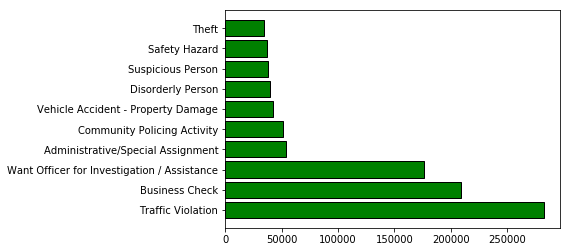

In [25]:
#10.	Make a horizontal barplot of the crime counts.

#?plt.barh

plt.barh('crime', 'count', data=tendesc10, color = 'green', edgecolor = 'black');

#plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

In [26]:
#12.	Since the 2018 data is incomplete, find the latest date for this dataset.  So that comparisons are commensurate, 
#remove rows from the 2013 data that are later than the latest month and day in the 2018 data.


police_2018_subset.head()
#police_2018_subset['call_time'] = pd.to_datetime(police_2018_subset['call_time'])
end_date = police_2018_subset['call_time'].max()
end_date

#'09/21/2018 12:59:58 AM'

police_2013_130921_bool = police_2013_subset['call_time'] <= '09/21/2013 12:59:58 AM'
police_2013_130921 = police_2013_subset.loc[police_2013_130921_bool]
police_2013_130921.tail()

#mask = (df['birth_date'] > start_date) & (df['birth_date'] <= end_date)
#df = df.loc[mask]

pol2013 = police_2013_130921
pol2018 = police_2018_subset




NameError: name 'police_2018_subset' is not defined

In [27]:
#13.	Create subsets of the 2013 and 2018 police call data that includes these five tencodes:
#•	Holdup / Robbery
#•	Bank Robbery
#•	Burglary – Residence
#•	Burglary - Non-Residence
#•	Theft

pol2013.head()
#pol2018.columns

content_check2013 = pol2013.tencode_desc.value_counts()
content_check2013
content_check2018 = pol2018.tencode_desc.value_counts()
content_check2018

#type_counts = police_2013_subset.unit.value_counts()

#pol2013['tencode_desc']

pol2013_five_bool = pol2013.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery' ,'Burglary - Residence' , 'Burglary - Non-Residence' , 'Theft'])
pol2013_five_bool.head()
pol2013_five = pol2013.loc[pol2013_five_bool]
pol2013_five.head()
pol2013_five.tencode_desc.value_counts()
#police_2013_130921 = police_2013_subset.loc[police_2013_130921_bool]
#pol2013_five_count = pol2013_five.tencode_desc.value_counts()
#pol2013_five_count


#Data.loc[[‘Andrade’, ‘Veness’]]



#keep_cols = ['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude', 'Longitude']
#police_2013_subset = police_2013[keep_cols]
#police_2013_subset.columns


pol2018_five_bool = pol2018.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery' ,'Burglary - Residence' , 'Burglary - Non-Residence' , 'Theft'])
pol2018_five_bool.head()
pol2018_five = pol2018.loc[pol2018_five_bool]
pol2018_five.head()
pol2018_five.tencode_desc.value_counts()


NameError: name 'pol2013' is not defined

In [28]:
#14.	Add a column named ‘year’ to each of these new subset data frames. 
#Set year to 2013 in the 2013 subset and set year to 2018 in the 2018 subset.

pol2013_five2 = pol2013_five
pol2013_five2['year'] = '2013'
pol2013_five2.head()


pol2018_five2 = pol2018_five
pol2018_five2['year'] = '2018'
pol2018_five2.head()



#df['Name'] = 'abc'


NameError: name 'pol2013_five' is not defined

In [29]:
pol2013_five2.info()

NameError: name 'pol2013_five2' is not defined

In [30]:
pol2018_five2.info()

NameError: name 'pol2018_five2' is not defined

In [31]:
#15.	Combine the 2013 and 2018 subset data into a single data frame called crimes. Since they have the same columns, 
#you can concatenate the data frames. 
#How many rows and columns are there in the combined data frame?


pol1318 = pd.concat([pol2013_five2, pol2018_five2])
pol1318.info()

NameError: name 'pol2013_five2' is not defined

In [32]:
#16.	Check the value counts for the tencode description in the crimes data. 
#Using the pandas map function, change the descriptions so there are just three categories: 
#Burglary (includes ‘Burglary - Residence' and 'Burglary - Non-Residence'), 
#Robbery (includes 'Bank Robbery' and 'Holdup / Robbery'), and Theft (includes ‘Theft’). 
#Check the value counts again to confirm your changes.

pol1318.tencode_desc.value_counts()


NameError: name 'pol1318' is not defined

In [33]:
#16b - continued
#alt - use map instead of replace

#pol1318['tencode_desc'], replace(['aaa', 'bbb'], 'ccc')
pol1318_3 = pol1318
pol1318_3['tencode_desc']=pol1318_3['tencode_desc'].replace(['Burglary - Residence', 'Burglary - Non-Residence'], 'Burglary')
pol1318_3['tencode_desc']=pol1318_3['tencode_desc'].replace(['Bank Robbery', 'Holdup / Robbery'], 'Robbery')
pol1318_3.tencode_desc.value_counts()


#df['BrandName'].replace(['ABC', 'AB'], 'A')

NameError: name 'pol1318' is not defined

In [34]:
pol1318_3.head()

NameError: name 'pol1318_3' is not defined

In [35]:
#17.	Create a data frame called aggregated_df with the year, crime category, and count of calls 
#for the year and category.


#aggregated_df = pol1318_3.tencode_desc.value_counts()
aggregated_pol1318 = pol1318_3
#aggregated_pol1318.groupby(['year', 'tencode_desc']).size()
#aggregated_pol1318
agg_pol1318 = aggregated_pol1318.groupby(['year', 'tencode_desc']).size()
agg_pol1318b = agg_pol1318.reset_index()
agg_pol1318b.head()
agg_pol1318b.columns = ['year', 'tencode_desc', 'count']
agg_pol1318b



NameError: name 'pol1318_3' is not defined

In [36]:
#18.	Plot a Seaborn facet grid to compare the 2013 and 2018 count of crimes for each category. 
#Has any category changed significantly from 2013 to 2018?

g = sns.FacetGrid(agg_pol1318b, col="year", height=4, aspect=1)
g.map(sns.barplot, "tencode_desc", "count");

print('YTD Theft has increased from 2013 to 2018')
print('Burglary and Robbery have not changed significantly')


#plt.figure(figsize = (10, 8))
#sns.set(style="whitegrid")
#sns.barplot('count', 'type', data = type_counts)
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Types of Public Art in Nashville');



NameError: name 'agg_pol1318b' is not defined

In [37]:
#intall folium



In [38]:
#import folium

import folium

In [39]:
#19.	Which sector had the least number of calls for 2013? How many calls? What about 2018?

agg_pol1318b
#agg_pol1318b.tencode_desc.min()

#agg_pol1318b[['year','tencode_desc']].min()

agg_pol1318b.groupby(['year', 'tencode_desc']).agg('min')


#df.groupby('A').agg('min')



NameError: name 'agg_pol1318b' is not defined

In [40]:
#23.	Create a folium map of Nashville using [36.1612, -86.7775] as the location to center the map on. 
#Experiment with different values for the zoom_start argument.


nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2
                    )
nash_map

In [41]:
#24.	You have been asked whether more robberies occur near highways. 
#One theory is that robbers rob near highways so that they can make a speedy getaway. 
#As an initial test of this assumption, map the locations of robberies in your crimes data that have 
#a disposition description of ‘GONE ON ARRIVAL’. 
#First create a subset of the data that contains only the rows of interest. 
#Then create a folium map of locations by building a for-loop and using the iterrows() function 
#to create point locations, and map each point as you loop through your dataframe.

pol2018_five_boolrob = pol2018.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery'])
pol2018_five_boolrob.head()
pol2018_five_rob = pol2018.loc[pol2018_five_boolrob]
pol2018_five_rob.head()
rob2018 = pol2018_five_rob

rob2018.head()
# keep disposition = 5

rob2018_boolrob = rob2018.disposition.isin ([5])
rob2018_boolrob.head()
disregard2018 = rob2018.loc[rob2018_boolrob]
disregard2018.head()



nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


disregard2018.isnull().sum()
disregard2018=disregard2018.dropna(subset = ['lat', 'lng'])


                      
for ind, row in disregard2018.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("folium_2018.html")
                      
#rob2018.head()
                      

#for ind, row in art.iterrows():
#    point = [row['Latitude'], row['Longitude']]
#    folium.Marker(point).add_to(nash_map)


NameError: name 'pol2018' is not defined

In [42]:
#24.	for 2013

pol2013_five_boolrob = pol2013.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery'])
pol2013_five_boolrob.head()
pol2013_five_rob = pol2013.loc[pol2013_five_boolrob]
pol2013_five_rob.head()
rob2013 = pol2013_five_rob

rob2013.head()
# keep disposition = 5

rob2013_boolrob = rob2013.disposition.isin ([5])
rob2013_boolrob.head()
disregard2013 = rob2013.loc[rob2013_boolrob]
disregard2013.head()



nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


disregard2013.isnull().sum()
disregard2013=disregard2013.dropna(subset = ['lat', 'lng'])


                      
for ind, row in disregard2013.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("folium_2013.html")
                      
#rob2018.head()
                      

#for ind, row in art.iterrows():
#    point = [row['Latitude'], row['Longitude']]
#    folium.Marker(point).add_to(nash_map)


NameError: name 'pol2013' is not defined

In [43]:
#25.	Another theory says that more burglaries occurs on rainy days. 
#Weather data is available in a SQLite database file called weather.db.

db = '../data/weather.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)


OperationalError: unable to open database file

In [44]:
mycursor.execute("SELECT * FROM weather2013;")

weather_data_2013 = (mycursor.fetchall())
weather_data_2013

NameError: name 'mycursor' is not defined

In [45]:
weather_2013_df = pd.read_sql_query("SELECT * FROM weather2013;", con)

weather_2013_df.describe()

NameError: name 'con' is not defined

In [46]:
#26.	Plot the unique weather stations on a map. Choose the one you think is closest to the city center. 
#Filter the 2013 weather data to grab only the rows for this station.

weather_2013_df.isnull().sum()
weather_2013_df=weather_2013_df.dropna(subset = ['lat', 'lng'])
weather_2013_df.head()
#unique_sta_2013 = weather_2013_df['name'].unique().tolist()

#unique_sta_2013_df = pd.DataFrame(unique_sta_2013)
#unique_sta_2013_df

unique_stations = weather_2013_df.drop_duplicates(subset=['name'])
unique_stations.describe()

nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


unique_stations.isnull().sum()
unique_stations=unique_stations.dropna(subset = ['lat', 'lng'])


                      
for ind, row in unique_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("weather_sta.html")


NameError: name 'weather_2013_df' is not defined

In [47]:
#to find closest stations to Nashville

unique_stations.head()
uniq_compare_lat = unique_stations
uniq_compare_lat.columns

uniq_compare_lat.to_numeric(uniq_compare_lat[lat])


#uniq_compare_lat["lat_dif"] = (36.1612-uniq_compare_lat['lat'])

NameError: name 'unique_stations' is not defined

In [48]:
uniq_compare_lat.info()


NameError: name 'uniq_compare_lat' is not defined

In [49]:
# convert lat and lgn fromn string to numeric, diff for lat and lng, abs value, add, find min

In [50]:
#Start of Justin's Code
Years=["2016","2017"]

In [51]:
police_2016.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1127954,PD201601316048,12/31/2016 11:57:00 PM,20161153532,0,43,Want Officer for Investigation / Assistance,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,5TH AV S & BROADWAY,ST12,C,21.0,4109.0,36.160,-86.778,"(36.16, -86.778)"
1127955,PD201601316049,12/31/2016 11:58:00 PM,0,0,43,Want Officer for Investigation / Assistance,PM,REQUEST MNPD WITH MEDICAL RESPONSE,11,DISREGARD / SIGNAL 9,2100.0,12TH AV N,0,N,11.0,4491.0,36.186,-86.808,"(36.186, -86.808)"
1127956,PD201601316051,12/31/2016 11:58:00 PM,20161153535,0,46,Vehicle Accident - Personal Injury,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,HAYWOOD LN & APACHE TRL,325C,S,21.0,8707.0,36.070,-86.694,"(36.07, -86.694)"
1127957,PD201601316052,12/31/2016 11:59:00 PM,20161153536,0,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,0.0,DR D B TODD JR BLVD & ALBION S,6F70,N,15.0,5409.0,36.166,-86.805,"(36.166, -86.805)"
1127958,PD201601316053,12/31/2016 11:59:00 PM,20170000088,0,45,Vehicle Accident - Property Damage,P,PROGRESS,5,GONE ON ARRIVAL,0.0,I440 E & NOLENSVILLE PKE,825C,MT,25.0,8321.0,36.123,-86.751,"(36.123, -86.751)"


In [52]:
police_2017.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1105378,PD201701313668,12/31/2017 11:56:00 PM,20171140163,NaN,44,Disorderly Person,P,PROGRESS,4,ASSISTED CITIZEN,0.0,SHELBY AV & I24 E,UTV2,C,13.0,1107.0,36.167,-86.765,"(36.167, -86.765)"
1105379,PD201701313669,12/31/2017 11:57:00 PM,20180000007,NaN,57,Fight / Assault,P,PROGRESS,4,ASSISTED CITIZEN,400.0,BROADWAY,SQUAD,C,21.0,4107.0,36.161,-86.778,"(36.161, -86.778)"
1105380,PD201701313670,12/31/2017 11:58:00 PM,20180000005,NaN,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,1900.0,DIVISION ST,815C,MT,11.0,6711.0,36.149,-86.797,"(36.149, -86.797)"
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,5400.0,NOLENSVILLE PKE,834C,MT,35.0,8655.0,36.051,-86.714,"(36.051, -86.714)"
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,1300.0,RURAL HILL RD,317C,S,25.0,8861.0,36.056,-86.651,"(36.056, -86.651)"


In [53]:
# Create a new columns for Year, Day and Month, Hour
time_crime_2016=pd.DataFrame(police_2016)
time_crime_2016["Month"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[0]
time_crime_2016["Day"] = time_crime_2016["Call Received"].str.rstrip('/').str.split('/').str[1]
time_crime_2016["Year"] = time_crime_2016["Call Received"].str.slice(6,11)
time_crime_2016["Time"] = time_crime_2016["Call Received"].str.slice(11,24) 




#crime_data_All_DF["Hour"] = crime_data_All_DF["Time"].str.rstrip(':').str.split(':').str[0].astype(int) 
time_crime_2016.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time
0,PD201600000001,01/01/2016 12:00:00 AM,20160000002,C,96,Business Check,0,0,12,LOCATION/BUILDING SECURE,...,S,11.0,8125.0,36.133,-86.752,"(36.133, -86.752)",01,01,2016,12:00:00 AM
1,PD201600000002,01/01/2016 12:00:00 AM,20160000003,C,96,Business Check,0,0,12,LOCATION/BUILDING SECURE,...,E,11.0,1113.0,36.173,-86.764,"(36.173, -86.764)",01,01,2016,12:00:00 AM
2,PD201600000003,01/01/2016 12:00:00 AM,20160000017,C,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,...,MT,33.0,8657.0,36.055,-86.743,"(36.055, -86.743)",01,01,2016,12:00:00 AM
3,PD201600000004,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,...,E,11.0,1011.0,36.167,-86.762,"(36.167, -86.762)",01,01,2016,12:00:00 AM
4,PD201600000005,01/01/2016 12:00:00 AM,20160000005,C,96,Business Check,0,0,12,LOCATION/BUILDING SECURE,...,S,25.0,8721.0,36.046,-86.666,"(36.046, -86.666)",01,01,2016,12:00:00 AM


In [57]:
def convert_to_24(time):
    if time[-2:] == "AM" and time[:2] == "12":
        return "00"+time[2:-2]
    elif time[-2:] == "AM":
        return time[:-2]
    elif time[-2:] == "PM" and time[:2] == "12":
        return time[:-2]
    else:
        return str(int(time[:2]) + 12) + time[2:8]

In [58]:
time_crime_2016['Time'] = time_crime_2016['Time'].apply(convert_to_24)

In [59]:
time_crime_2016["Hour"] = time_crime_2016["Time"].str.slice(0,2).astype(int)
time_crime_2016.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Hour
1127954,PD201601316048,12/31/2016 11:57:00 PM,20161153532,0,43,Want Officer for Investigation / Assistance,P,PROGRESS,11,DISREGARD / SIGNAL 9,...,21.0,4109.0,36.160,-86.778,"(36.16, -86.778)",12,31,2016,23:57:00,23
1127955,PD201601316049,12/31/2016 11:58:00 PM,0,0,43,Want Officer for Investigation / Assistance,PM,REQUEST MNPD WITH MEDICAL RESPONSE,11,DISREGARD / SIGNAL 9,...,11.0,4491.0,36.186,-86.808,"(36.186, -86.808)",12,31,2016,23:58:00,23
1127956,PD201601316051,12/31/2016 11:58:00 PM,20161153535,0,46,Vehicle Accident - Personal Injury,P,PROGRESS,1,M.P.D. REPORT COMPLED,...,21.0,8707.0,36.070,-86.694,"(36.07, -86.694)",12,31,2016,23:58:00,23
1127957,PD201601316052,12/31/2016 11:59:00 PM,20161153536,0,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,...,15.0,5409.0,36.166,-86.805,"(36.166, -86.805)",12,31,2016,23:59:00,23
1127958,PD201601316053,12/31/2016 11:59:00 PM,20170000088,0,45,Vehicle Accident - Property Damage,P,PROGRESS,5,GONE ON ARRIVAL,...,25.0,8321.0,36.123,-86.751,"(36.123, -86.751)",12,31,2016,23:59:00,23


In [60]:
#bins = [0, 7, 12, 18, 23]
#group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
bins = [-1, 7, 12, 18, 23]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening']


time_crime_2016["Hour Bin"] = pd.cut(time_crime_2016["Hour"], bins, labels=group_names)
time_crime_2016.tail(2)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Hour,Hour Bin
1127957,PD201601316052,12/31/2016 11:59:00 PM,20161153536,0,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,...,5409.0,36.166,-86.805,"(36.166, -86.805)",12,31,2016,23:59:00,23,Evening
1127958,PD201601316053,12/31/2016 11:59:00 PM,20170000088,0,45,Vehicle Accident - Property Damage,P,PROGRESS,5,GONE ON ARRIVAL,...,8321.0,36.123,-86.751,"(36.123, -86.751)",12,31,2016,23:59:00,23,Evening


In [61]:
#2.	Read in police call data for 2017 to a data frame called police_2017 and look at the first 5 rows. 
    #Look at the last five rows of police_2017


police_2017 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2017_.csv')
police_2017.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201700000001,01/01/2017 12:00:00 AM,20170000179,C,57,Fight / Assault,R,REPORT,10,NO RESPONSE,100.0,SOUTHRIDGE DR,225C,E,25.0,2021.0,36.233,-86.765,"(36.233, -86.765)"
1,PD201700000002,01/01/2017 12:00:00 AM,20170000001,C,93,Traffic Violation,NaN,NaN,0,NaN,0.0,GALLATIN AV,5153,NaN,NaN,NaN,NaN,NaN,NaN
2,PD201700000003,01/01/2017 12:00:00 AM,20170000002,C,3,Administrative/Special Assignment,NaN,NaN,4,ASSISTED CITIZEN,900.0,ROSA L PARKS BLVD,125B,N,17.0,4239.0,36.171,-86.790,"(36.171, -86.79)"
3,PD201700000005,01/01/2017 12:01:00 AM,20170000004,C,93,Traffic Violation,NaN,NaN,6,ASSISTED OTHER UNIT,0.0,N 11TH ST & WOODLAND ST,5155,E,13.0,1241.0,36.178,-86.750,"(36.178, -86.75)"
4,PD201700000006,01/01/2017 12:01:00 AM,20170000007,C,83,Shots Fired,P,PROGRESS,6,ASSISTED OTHER UNIT,1000.0,DOUGLAS AV,220C,E,27.0,1895.0,36.193,-86.747,"(36.193, -86.747)"


In [63]:
# Create a new columns for Year, Day and Month, Hour for 2017
time_crime_2017=pd.DataFrame(police_2017)
time_crime_2017["Month"] = time_crime_2017["Call Received"].str.rstrip('/').str.split('/').str[0]
time_crime_2017["Day"] = time_crime_2017["Call Received"].str.rstrip('/').str.split('/').str[1]
time_crime_2017["Year"] = time_crime_2017["Call Received"].str.slice(6,11)
time_crime_2017["Time"] = time_crime_2017["Call Received"].str.slice(11,24) 

time_crime_2017.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time
1105378,PD201701313668,12/31/2017 11:56:00 PM,20171140163,NaN,44,Disorderly Person,P,PROGRESS,4,ASSISTED CITIZEN,...,C,13.0,1107.0,36.167,-86.765,"(36.167, -86.765)",12,31,2017,11:56:00 PM
1105379,PD201701313669,12/31/2017 11:57:00 PM,20180000007,NaN,57,Fight / Assault,P,PROGRESS,4,ASSISTED CITIZEN,...,C,21.0,4107.0,36.161,-86.778,"(36.161, -86.778)",12,31,2017,11:57:00 PM
1105380,PD201701313670,12/31/2017 11:58:00 PM,20180000005,NaN,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,...,MT,11.0,6711.0,36.149,-86.797,"(36.149, -86.797)",12,31,2017,11:58:00 PM
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,...,MT,35.0,8655.0,36.051,-86.714,"(36.051, -86.714)",12,31,2017,11:58:00 PM
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,...,S,25.0,8861.0,36.056,-86.651,"(36.056, -86.651)",12,31,2017,11:59:00 PM


In [69]:
time_crime_2017['Time'] = time_crime_2017['Time'].apply(convert_to_24)

In [70]:
time_crime_2017["Hour"] = time_crime_2017["Time"].str.slice(0,2).astype(int)
time_crime_2017.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Hour
1105378,PD201701313668,12/31/2017 11:56:00 PM,20171140163,NaN,44,Disorderly Person,P,PROGRESS,4,ASSISTED CITIZEN,...,13.0,1107.0,36.167,-86.765,"(36.167, -86.765)",12,31,2017,23:56:00,23
1105379,PD201701313669,12/31/2017 11:57:00 PM,20180000007,NaN,57,Fight / Assault,P,PROGRESS,4,ASSISTED CITIZEN,...,21.0,4107.0,36.161,-86.778,"(36.161, -86.778)",12,31,2017,23:57:00,23
1105380,PD201701313670,12/31/2017 11:58:00 PM,20180000005,NaN,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,...,11.0,6711.0,36.149,-86.797,"(36.149, -86.797)",12,31,2017,23:58:00,23
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,...,35.0,8655.0,36.051,-86.714,"(36.051, -86.714)",12,31,2017,23:58:00,23
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,...,25.0,8861.0,36.056,-86.651,"(36.056, -86.651)",12,31,2017,23:59:00,23


In [71]:
#bins = [0, 7, 12, 18, 23]
#group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
bins = [-1, 7, 12, 18, 23]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening']


time_crime_2017["Hour Bin"] = pd.cut(time_crime_2017["Hour"], bins, labels=group_names)
time_crime_2017.tail(2)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,...,Reporting Area (RPA),Latitude,Longitude,Mapped Location,Month,Day,Year,Time,Hour,Hour Bin
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,...,8655.0,36.051,-86.714,"(36.051, -86.714)",12,31,2017,23:58:00,23,Evening
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,...,8861.0,36.056,-86.651,"(36.056, -86.651)",12,31,2017,23:59:00,23,Evening


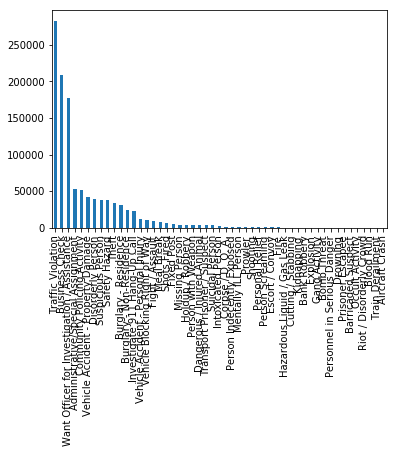

In [64]:
#Bar chart of tencode descriptions
fig, ax = plt.subplots()
time_crime_2016['Tencode Description'].value_counts().plot(ax=ax, kind='bar')

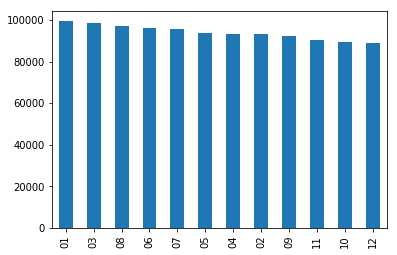

In [65]:
#Bar graph of months by number of calls
fig, ax = plt.subplots()
time_crime_2016['Month'].value_counts().plot(ax=ax, kind='bar')

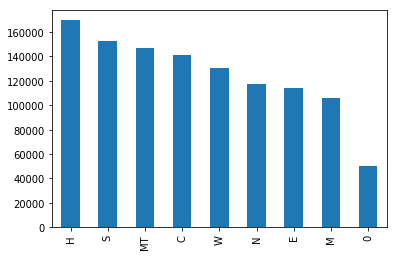

In [66]:
#Bar graph of calls per Sector of the City
fig, ax = plt.subplots()
time_crime_2016['Sector'].value_counts().plot(ax=ax, kind='bar')

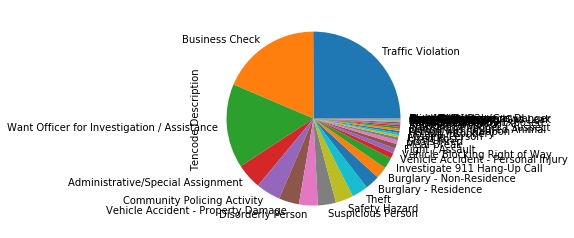

In [67]:
#Pie chart of Tencode descriptions
time_crime_2016['Tencode Description'].value_counts().plot(kind='pie')

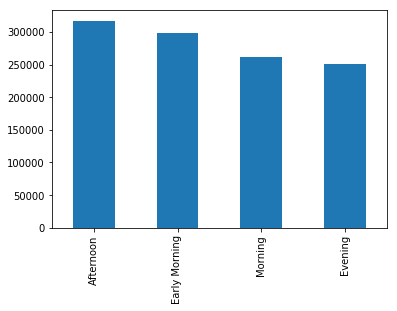

In [73]:
#Bar chart of hour bins
fig, ax = plt.subplots()
time_crime_2016['Hour Bin'].value_counts().plot(ax=ax, kind='bar')

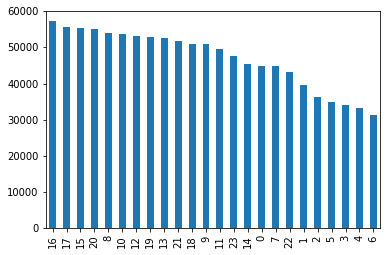

In [74]:
#Bar chart of calls byhour 
fig, ax = plt.subplots()
time_crime_2016['Hour'].value_counts().plot(ax=ax, kind='bar')

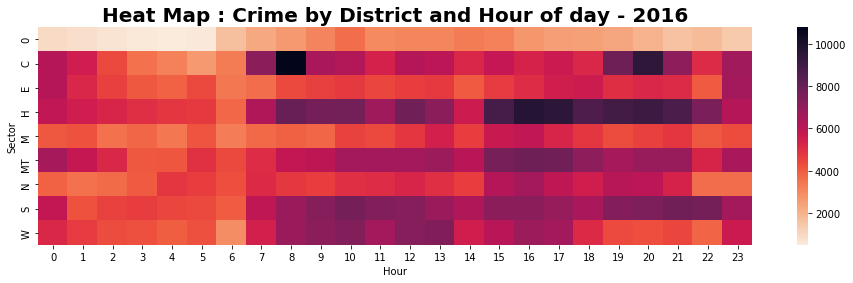

In [90]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Sector', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode Description"}, inplace=True)
df_h = df_gb_2016.pivot("Sector", "Hour", "Tencode Description")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by District and Hour of day - 2016', fontsize=20, weight='bold')
plt.savefig ("heatmap_sector_2016.png")
plt.show()

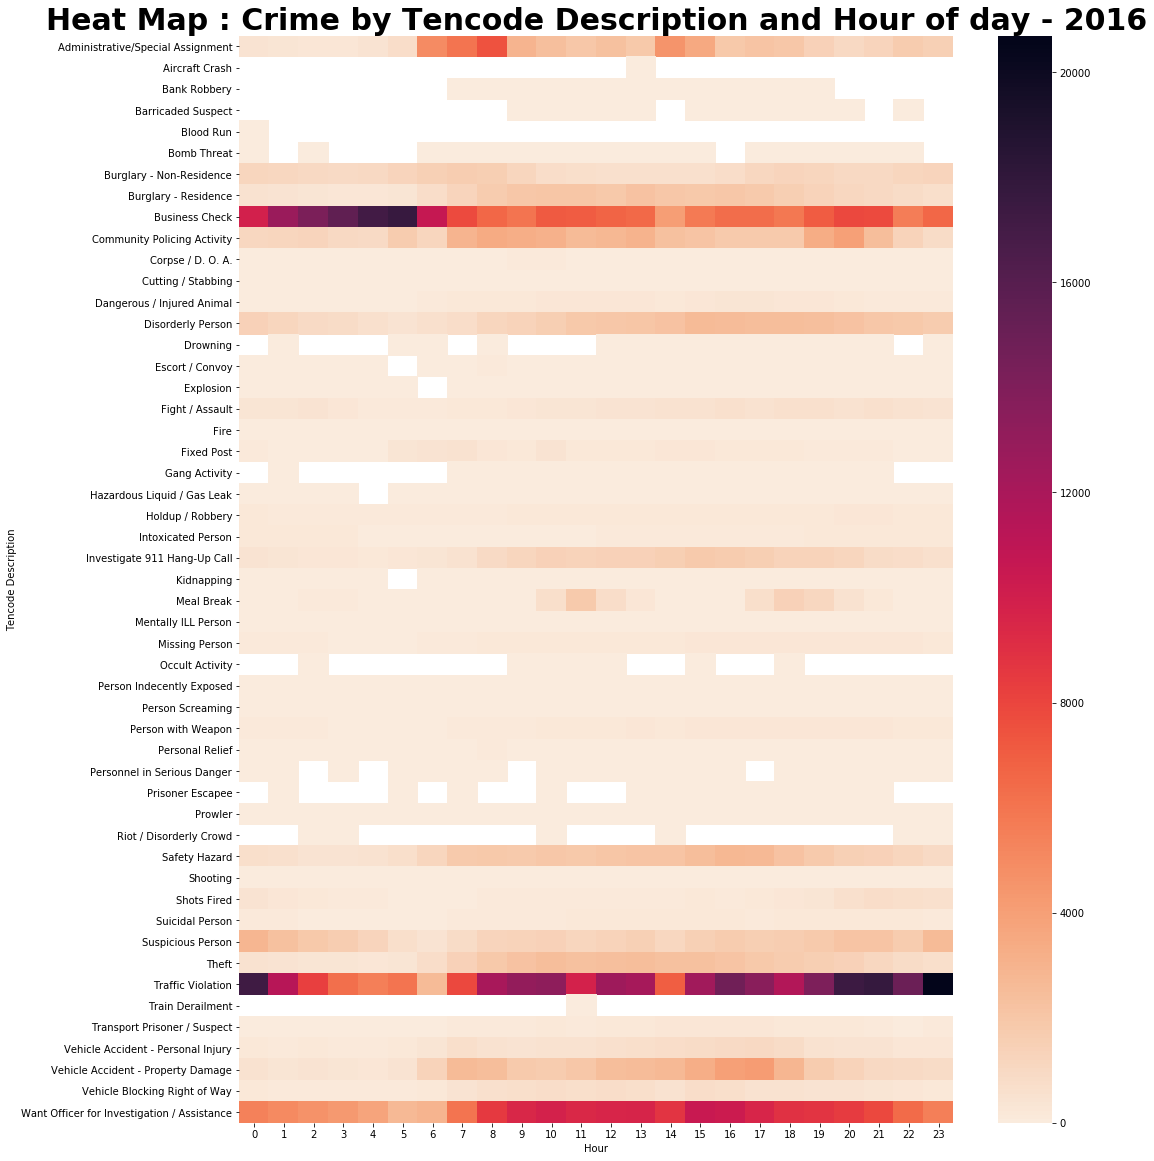

In [91]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Hour']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Hour", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Hour of day - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_time_2016.png")
plt.show(5)

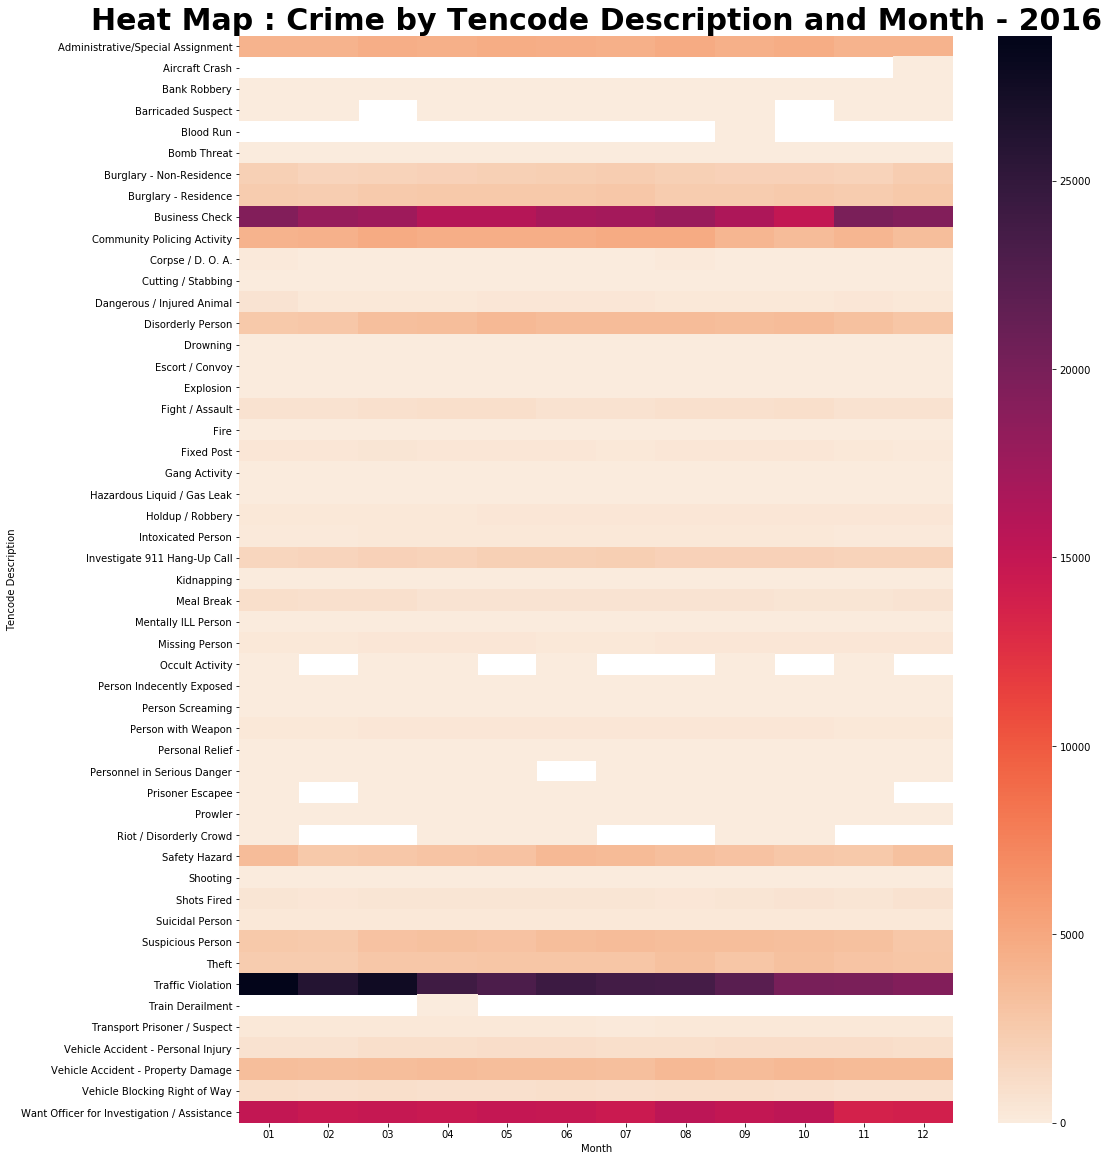

In [89]:
df_gb_2016 = pd.DataFrame(time_crime_2016.groupby(['Tencode Description', 'Month']).size())
df_gb_2016.reset_index(inplace=True)
df_gb_2016.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2016.pivot("Tencode Description", "Month", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Month - 2016', fontsize=30, weight='bold')
plt.savefig ("heatmap_month_2016.png")
plt.show(5)

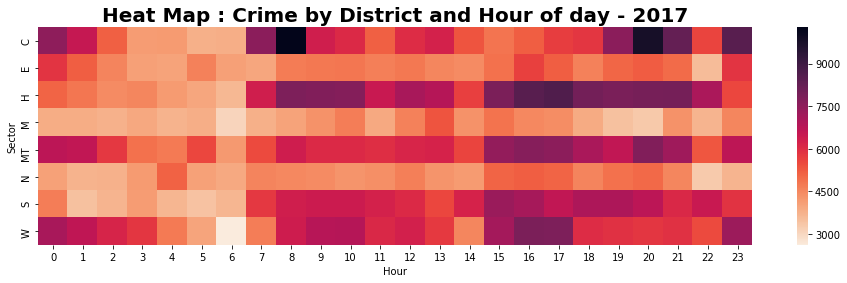

In [93]:
df_gb_2017 = pd.DataFrame(time_crime_2017.groupby(['Sector', 'Hour']).size())
df_gb_2017.reset_index(inplace=True)
df_gb_2017.rename(columns={0:"Tencode Description"}, inplace=True)
df_h = df_gb_2017.pivot("Sector", "Hour", "Tencode Description")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by District and Hour of day - 2017', fontsize=20, weight='bold')
plt.savefig ("heatmap_sector_2017.png")
plt.show()

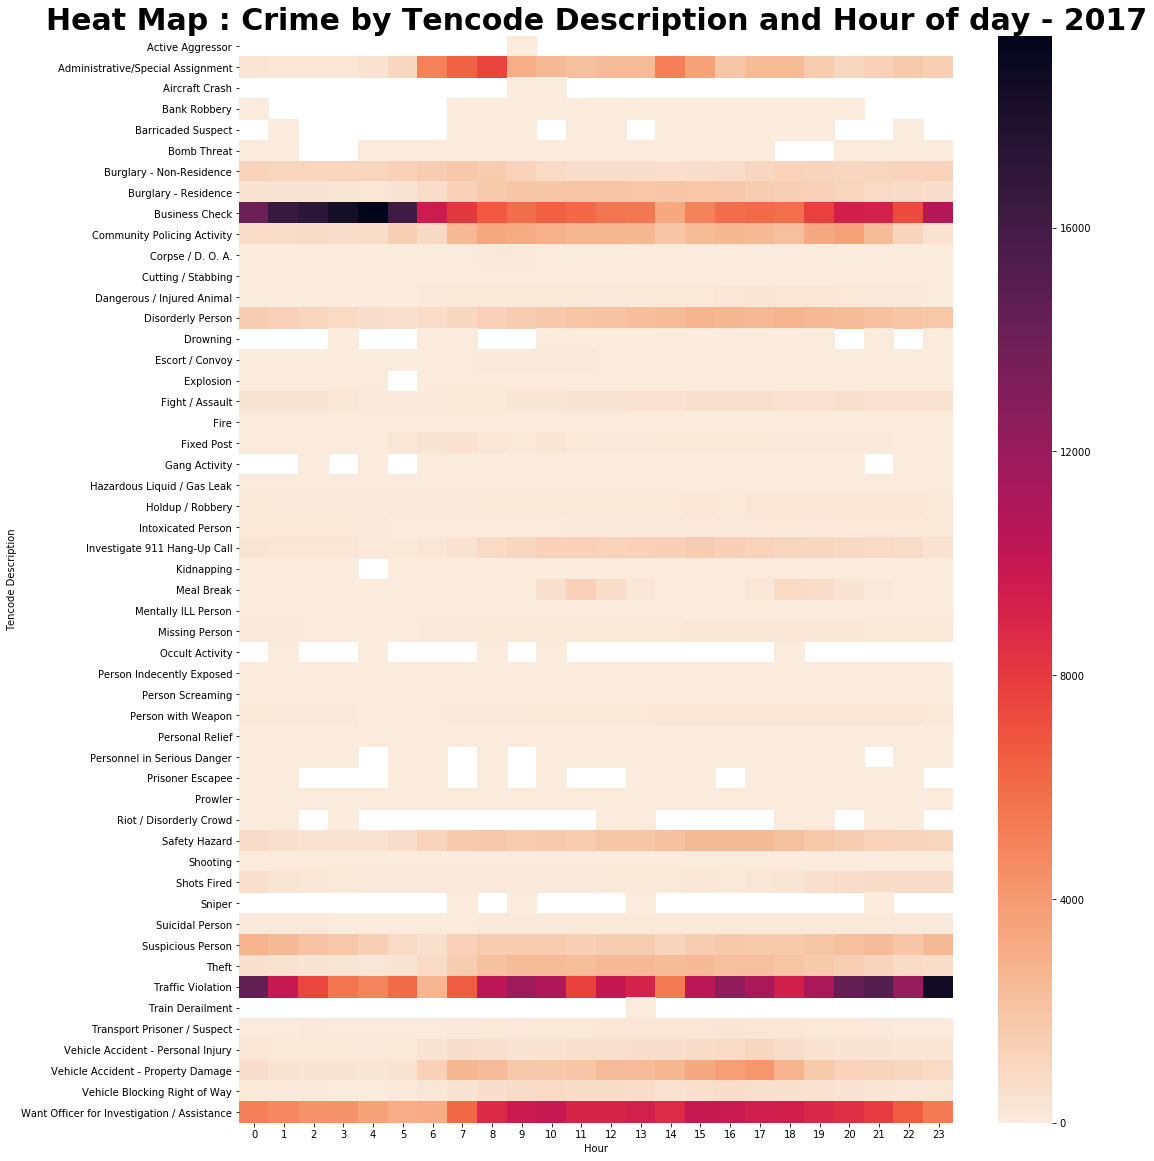

In [88]:
df_gb_2017 = pd.DataFrame(time_crime_2017.groupby(['Tencode Description', 'Hour']).size())
df_gb_2017.reset_index(inplace=True)
df_gb_2017.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2017.pivot("Tencode Description", "Hour", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Hour of day - 2017', fontsize=30, weight='bold')
plt.savefig ("heatmap_time_2017.png")
plt.show(5)

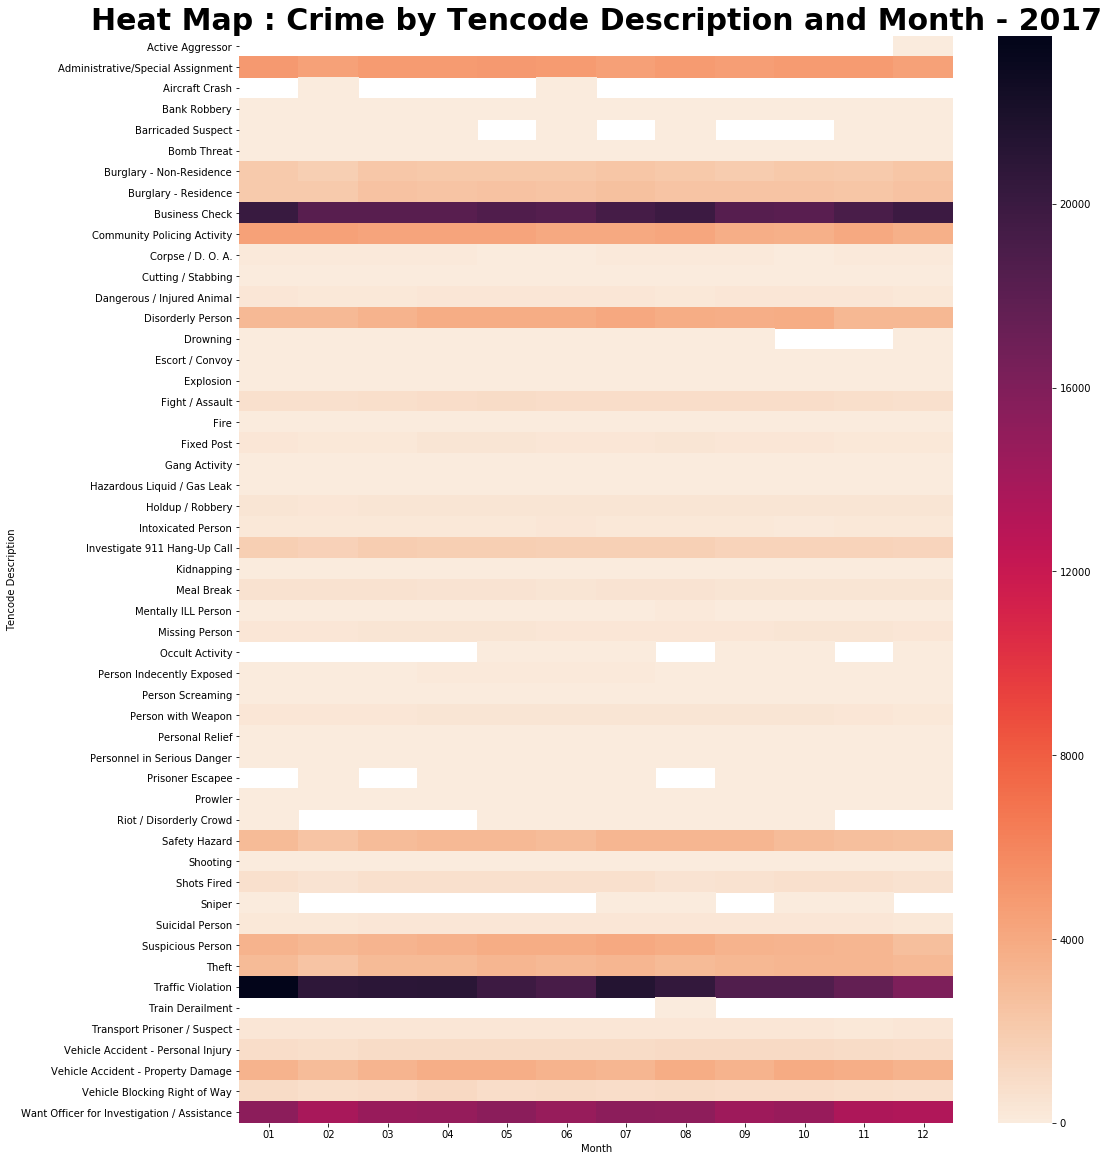

In [94]:
df_gb_2017 = pd.DataFrame(time_crime_2017.groupby(['Tencode Description', 'Month']).size())
df_gb_2017.reset_index(inplace=True)
df_gb_2017.rename(columns={0:"Tencode"}, inplace=True)
df_h = df_gb_2017.pivot("Tencode Description", "Month", "Tencode")
fig, ax = plt.subplots()
fig.set_size_inches(16, 20)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Tencode Description and Month - 2017', fontsize=30, weight='bold')
plt.savefig ("heatmap_month_2017.png")
plt.show(5)